<a href="https://colab.research.google.com/github/MK316/workshop22/blob/main/SMJ_Wordcloud_by_POS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text, Frequency, and Wordcloud by POS

## Corpus-toolkit for POS tagging

In [1]:
# Install {corpus-toolkit}
!pip install corpus-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.0 MB/s 


In [2]:
# Making a new folder named "txtdata" for corpus toolkit
import os
os.mkdir("txtdata")

In [3]:
# Current directory check
%pwd

'/content'

In [4]:
# Text from online
import os

%cd /content/txtdata/
url = "https://raw.githubusercontent.com/MK316/data/main/txtdata.txt"
os.system("curl " + url + " > txtdata.txt")

file = open("txtdata.txt")
text = file.read().replace("\n", " ")
file.close()

%cd /content/

/content/txtdata
/content


In [5]:
from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(mydata) #tokenize corpus - by default this lemmatizes as well
mydata = ct.frequency(mydata) #creates a frequency dictionary

Processing txtdata.txt (1 of 1 files)


In [6]:
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

Processing txtdata.txt (1 of 1 files)


In [7]:
tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

Processing 1.txt (1 of 1 files)
the_DET	37
of_ADP	21
be_AUX	20
light_NOUN	18
to_PART	17
a_DET	15
and_CCONJ	11
as_ADP	10
in_ADP	8
can_AUX	6


## Save tagged data as dataframe

In [8]:
# Tagged data is in a dict format
type(tagged_freq)

dict

In [9]:
# Import pandas to handle dataframe
import pandas as pd

In [10]:
data_dict = tagged_freq
data_items = data_dict.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df.columns = ["Tagged","Freq"]
print(df)

            Tagged  Freq
0        live_VERB     3
1       light_NOUN    18
2          the_DET    37
3     ability_NOUN     1
4           of_ADP    21
..             ...   ...
279      chief_ADJ     1
280   defense_NOUN     1
281  therefore_ADV     1
282     fight_VERB     1
283    flight_NOUN     1

[284 rows x 2 columns]


### Splitting tagged column => word, POS
e.g., before_ADP => before, ADP in separate columns

In [11]:
tagged = df["Tagged"]
pos = []
word = []

for i in range(0, len(tagged)):
  w = tagged[i]
  ws = w.split("_")
  word.append(ws[0])
  pos.append(ws[1])

print(len(tagged))
print(word[:10])
print(pos[:10])

284
['live', 'light', 'the', 'ability', 'of', 'some', 'specie', 'to', 'create', 'know']
['VERB', 'NOUN', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PART', 'VERB', 'VERB']


In [12]:
# Add new columns to the dataframe

df["POS"] = pos
df["Word"] = word

# Rearranging column order (remove Tagged column)
cols = ["POS","Word","Freq"]
df = df[cols]

# Sort by POS and Freq
df = df.sort_values(by=['POS', 'Freq'], ascending = False)
print("Total rows: ", len(df))
df.head()

Total rows:  284


,POS,Word,Freq
43,VERB,be,4
75,VERB,make,4
209,VERB,give,4
0,VERB,live,3
9,VERB,know,3


# Wordcloud by POS

* Below, "wc" takes text, not list. So we make word-list-by-POS into a text using 'join'. 
* In addition, the joined text should include words according to their frequency. (e.g., if "before" occurs 5 times, then the text should include "before before before before before".

In [ ]:
# Select POS = VERB
df1 = df[df["POS"] == "VERB"]; print(len(df1))

# as list
freq1 = list(df1["Freq"]); print(len(freq1))
txt1 = list(df1["Word"]); print(len(txt1))

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y); print(len(txt2))
print(txt2)

56
56
56
469
be be be be make make make make give give give give know know know attract attract attract have have have live live glow glow use use hide hide become become survive survive spot spot allow allow light light swim swim create glimmer do flash include take jellyfish descend disappear absorb leave fade need blend stand look solve avoid see illuminate match come turn alter depend pass block dim remain touch disturb startle escape dart help summon try threaten eat fight


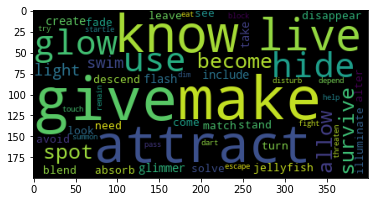

In [ ]:
# High frequency POS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(str(txt2)) 
plt.imshow(wc)

# The same process with POS options

87
      POS            Word  Freq
1    NOUN           light    18
79   NOUN           ocean     6
164  NOUN        predator     5
187  NOUN          shrimp     5
23   NOUN            life     4
..    ...             ...   ...
260  NOUN  dinoflagellate     1
267  NOUN         getaway     1
271  NOUN           syrup     1
280  NOUN         defense     1
283  NOUN          flight     1

[87 rows x 3 columns]


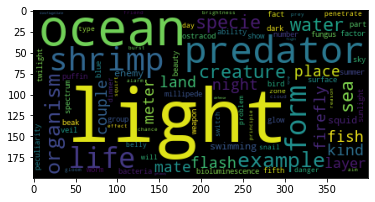

In [13]:
#@markdown Wordcloud by POS:

pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2)) 
plt.imshow(wc)

# Second wordcloud: with white background

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
#stopwords.add('us')
len(stopwords)
spltxt = text.split()

56


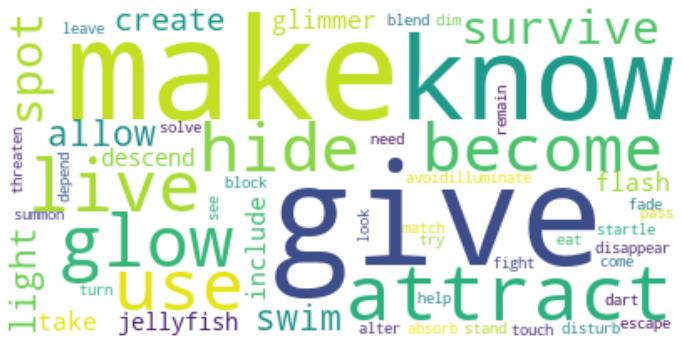

In [ ]:
#@markdown Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')